In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from ipywidgets import interact, FloatSlider
from collections import namedtuple

plt.style.use('fivethirtyeight')


In [17]:
N = 500
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__  = lambda s: f'𝒩(μ={s[0]:.3f}, 𝜎²={s[1]:.3f})'

In [14]:
def plt_g(mu,variance):
    gaussian = stats.norm(loc=mu, scale=variance)
    plt.figure(figsize=(16,9))
    xs = np.arange(2, 8, 0.01)
    ys = gaussian.pdf(xs)
    plt.plot(xs, ys)
    plt.ylim(0, 1)
    plt.show()

interact(plt_g, mu=FloatSlider(value=5, min=3, max=7),variance=FloatSlider(value = .03, min=.01, max=1.))

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

<function __main__.plt_g(mu, variance)>

𝒩(μ=25.000, 𝜎²=0.900)


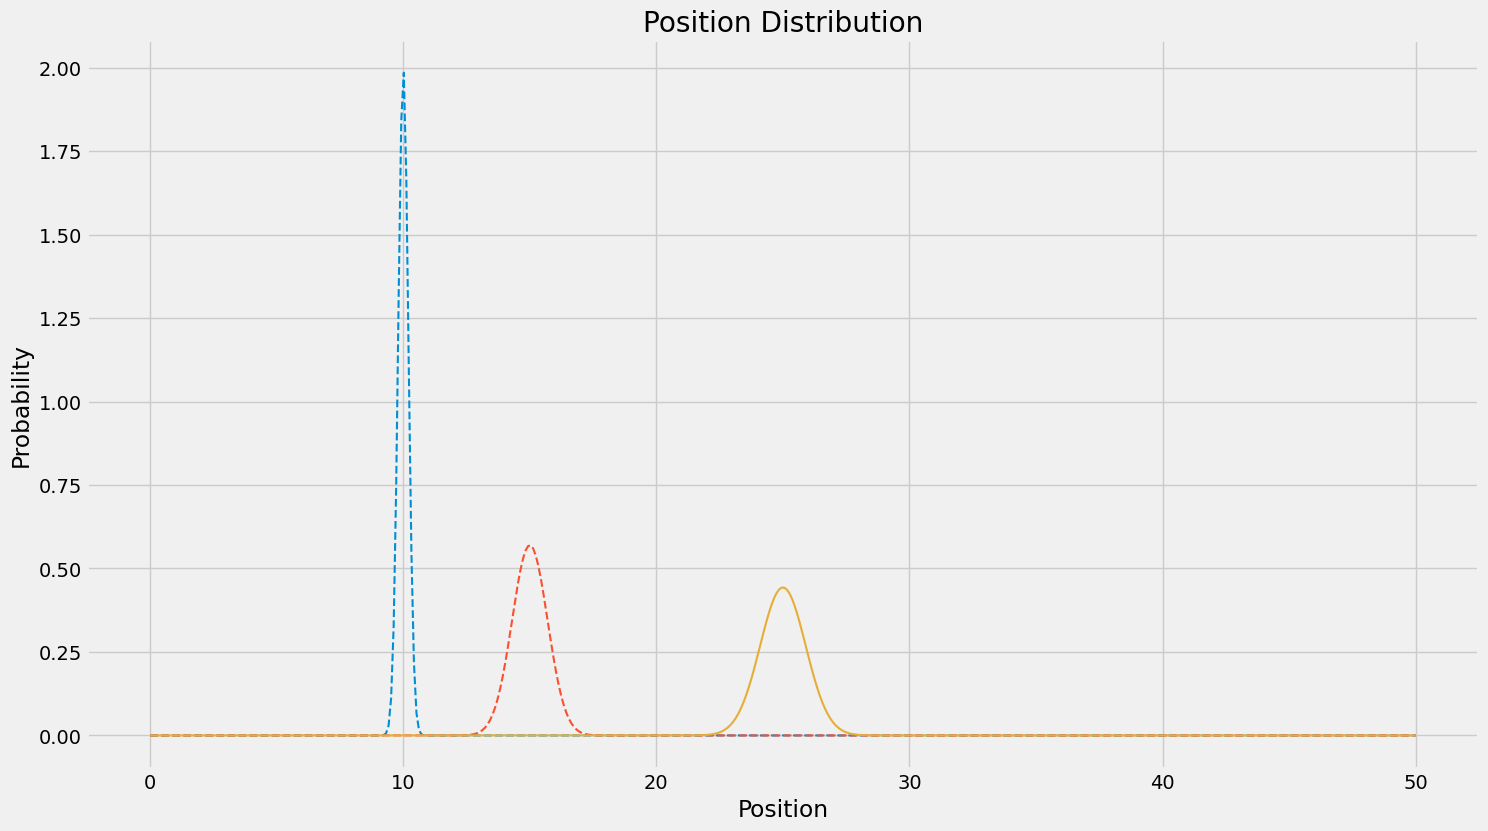

In [21]:
def predict(pos, movement):
    return gaussian(pos.mean + movement.mean, pos.var + movement.var)

pos  = gaussian(10, 0.2)
move = gaussian(15, 0.7)
prior= predict(pos, move)


dpos   = stats.norm(loc=pos.mean, scale=pos.var)
dmove  = stats.norm(loc=move.mean, scale=move.var)
dprior = stats.norm(loc=prior.mean, scale=prior.var)
x      = np.linspace(0,prior.mean *2, N)
y_pos  = dpos.pdf(x)
y_move = dmove.pdf(x)
y_prior= dprior.pdf(x)


plt.figure(figsize=(16,9))
plt.plot(x, y_pos, linestyle='--', linewidth=1.5, label=f'Pos : {pos}')
plt.plot(x, y_move, linestyle='--',  linewidth=1.5,label=f'Move:{move}')
plt.plot(x, y_prior, linewidth=1.5, label=f'prior: {prior}')
plt.title('Position Distribution')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.show()